# Keras Reinforcement Learning with Cartpole

In [1]:
import numpy as np
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only

In [2]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [23]:
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay
def show_video_all():
  mp4list = glob.glob('video/*.mp4')
  for num in range(len(mp4list)):
      print(mp4list[num])
      mp4 = mp4list[num]
      video = io.open(mp4, 'r+b').read()
      encoded = base64.b64encode(video)
      ipythondisplay.display(HTML(data='''<video alt="{1}" autoplay 
                controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'),mp4list[num])))
def show_video(num=0):
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > num:
    print(mp4list[num])
    mp4 = mp4list[num]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="{1}" autoplay 
                controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'),mp4list[num])))
  else: print("Could not find video")

def wrap_env(env): return Monitor(env, './video', force=True)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers.legacy import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

2023-03-21 15:22:09.498890: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-21 15:22:09.564249: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [5]:
import gym
from gym.wrappers import Monitor
import numpy as np
env=gym.make('CartPole-v0')
env._max_episode_steps = 1500
#env = wrap_env(env)
#np.random.seed(123)
#env.seed(123)

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(env.action_space.n))
model.add(Activation('linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 16)                80        
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 activation_1 (Activation)   (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 activation_2 (Activation)   (None, 16)                0

In [7]:
memory = SequentialMemory(limit=50000, window_length=1)
policy = BoltzmannQPolicy()

dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n, 
               memory=memory, 
               nb_steps_warmup=50,
               target_model_update=1e-2, 
               policy=policy)
dqn.compile(Adam(learning_rate=1e-3), metrics=['mae'])

2023-03-21 15:22:16.093284: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-21 15:22:16.111422: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-03-21 15:22:16.147802: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_3_1/kernel/Assign' id:188 op device:{requested: '', assigned: ''} def:{{{node dense_3_1/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_3_1/kernel, dense_3_1/kernel/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in th

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [24]:
scores = dqn.fit(env,nb_steps=10000,visualize=False,verbose=1)

Training for 10000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 16s - reward: 1.0000

/opt/conda/lib/python3.10/site-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-03-21 15:35:38.803597: W tensorflow/c/c_api.cc:291] Operation '{name:'activation_3_3/activation_3/Identity' id:1351 op device:{requested: '', assigned: ''} def:{{{node activation_3_3/activation_3/Identity}} = Identity[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_3_3/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-03-21 15:35:38.977469: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_11/AddN' id:1627 op device:{requested: '', assigned: ''} def:{{{node loss_11/AddN}} = AddN[N=2, T=DT_FLOAT, _has_manual_control_dependencies=true]

10000/10000 [==============================] - 49s 5ms/step - reward: 1.0000
done, took 49.123 seconds


In [9]:
weights_filename = 'dqn_cartpole_weights_50000.h5f'
dqn.save_weights(weights_filename, overwrite=True)

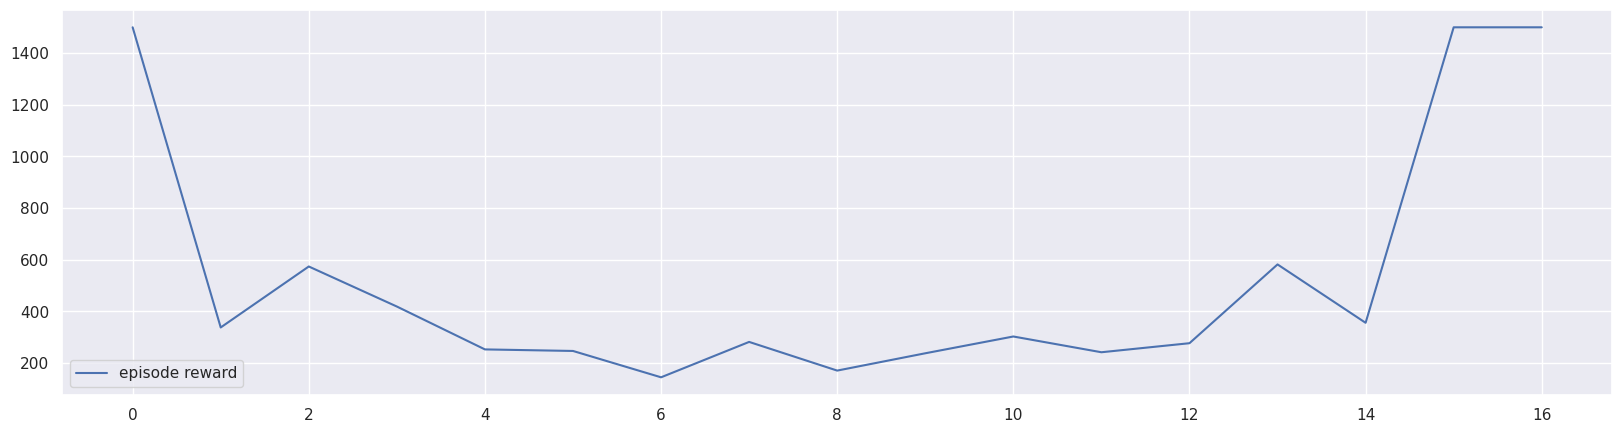

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()
plt.figure(figsize=(20, 5))
plt.plot(range(len(scores.history['episode_reward'])), scores.history['episode_reward'],label='episode reward')
plt.legend()
plt.show()

In [28]:
weights_filename = 'dqn_cartpole_weights.h5f'
model.load_weights(weights_filename)
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n, 
               memory=memory, 
               nb_steps_warmup=50,
               target_model_update=1e-2, 
               policy=policy)
dqn.compile(Adam(learning_rate=1e-3), metrics=['mae'])

2023-03-21 15:38:02.798039: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_1_4/bias/Assign' id:2019 op device:{requested: '', assigned: ''} def:{{{node dense_1_4/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_1_4/bias, dense_1_4/bias/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [29]:
#show_video()

In [30]:
#display = Display(visible=0, size=(400, 300))
#display.start()
env.close()
env.reset()

array([0.00113348, 0.00599817, 0.02191944, 0.03601338])

In [31]:
gym.logger.set_level(gym.logger.ERROR) #DEBUG)

In [32]:
env=gym.make('CartPole-v0')
env._max_episode_steps = 1500
env = wrap_env(env)
dqn.test(env, nb_episodes=2, visualize=True)
env.close()

Testing for 3 episodes ...


/opt/conda/lib/python3.10/site-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-03-21 15:38:06.670503: W tensorflow/c/c_api.cc:291] Operation '{name:'activation_3/activation_3/Identity' id:100 op device:{requested: '', assigned: ''} def:{{{node activation_3/activation_3/Identity}} = Identity[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_3/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-03-21 15:38:06.722252: W tensorflow/c/c_api.cc:291] Operation '{name:'total_12/Assign' id:2218 op device:{requested: '', assigned: ''} def:{{{node total_12/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype

Episode 1: reward: 1500.000, steps: 1500
Episode 2: reward: 1500.000, steps: 1500
Episode 3: reward: 1500.000, steps: 1500


In [33]:
show_video_all()

video/openaigym.video.2.13263.video000001.mp4


video/openaigym.video.2.13263.video000000.mp4


In [ ]:
#!python -m atari_py.import_roms ROMS